# 📝 Exercise M5.01

In the previous notebook, we showed how a tree with 1 level depth works. The
aim of this exercise is to repeat part of the previous experiment for a tree
with 2 levels depth to show how such parameter affects the feature space
partitioning.

We first load the penguins dataset and split it into a training and a testing
sets:

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [3]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0
)

Create a decision tree classifier with a maximum depth of 2 levels and fit the
training data.

In [4]:
# Write your code here.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)    # max_depth controls overfitting/underfitting
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Now plot the data and the decision boundary of the trained classifier to see
the effect of increasing the depth of the tree.

Hint: Use the class `DecisionBoundaryDisplay` from the module
`sklearn.inspection` as shown in previous course notebooks.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">At this time, it is not possible to use <tt class="docutils literal"><span class="pre">response_method="predict_proba"</span></tt> for
multiclass problems. This is a planned feature for a future version of
scikit-learn. In the mean time, you can use <tt class="docutils literal"><span class="pre">response_method="predict"</span></tt>
instead.</p>
</div>

/Users/danielliu/miniconda3/envs/mlmooc/lib/python3.13/site-packages/sklearn/inspection/_plot/decision_boundary.py:194: UserWarning: The following kwargs were not used by contour: 'cmat'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


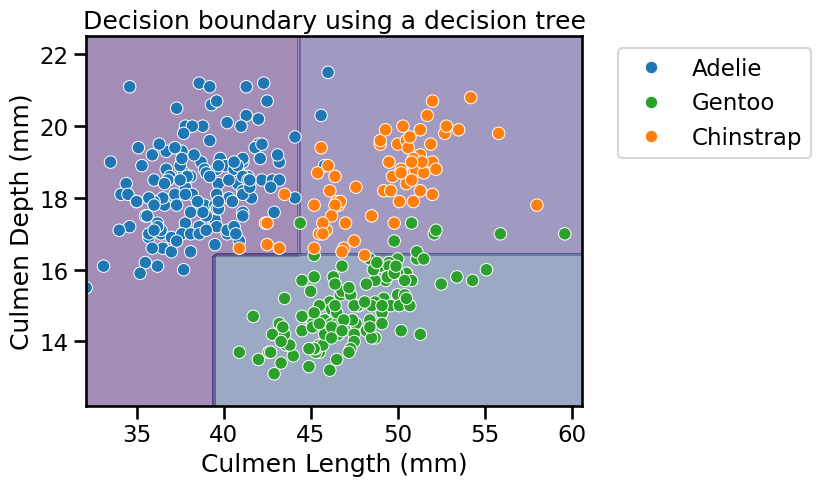

In [ ]:
# Write your code here.
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# mpl.colors.Normalize maps values from a data range to [0, 1],
# so they can be interpreted by colormaps.
# vmin=-0.5, vmax=8.5 sets the data range you're normalizing.
tab10_norm = mpl.colors.Normalize(vmin = -0.5, vmax = 8.5)

# create a color palette to be used for the three classes dots
palette = ["tab:blue", "tab:green", "tab:orange"]

# plot decision tree boundary
dbd = DecisionBoundaryDisplay.from_estimator(
    tree,
    X_train,
    response_method="predict",
    cmat="tab10",
    norm=tab10_norm,
    alpha = 0.5
)
# plot points
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],  # culmen length
    y=culmen_columns[1],   # culmen depth
    hue = target_column,
    palette = palette
)
# shift legend
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a decision tree")


In [7]:
DecisionBoundaryDisplay?

Init signature: DecisionBoundaryDisplay(*, xx0, xx1, response, xlabel=None, ylabel=None)
Docstring:     
Decisions boundary visualization.

It is recommended to use
:func:`~sklearn.inspection.DecisionBoundaryDisplay.from_estimator`
to create a :class:`DecisionBoundaryDisplay`. All parameters are stored as
attributes.

Read more in the :ref:`User Guide <visualizations>`.

.. versionadded:: 1.1

Parameters
----------
xx0 : ndarray of shape (grid_resolution, grid_resolution)
    First output of :func:`meshgrid <numpy.meshgrid>`.

xx1 : ndarray of shape (grid_resolution, grid_resolution)
    Second output of :func:`meshgrid <numpy.meshgrid>`.

response : ndarray of shape (grid_resolution, grid_resolution)
    Values of the response function.

xlabel : str, default=None
    Default label to place on x axis.

ylabel : str, default=None
    Default label to place on y axis.

Attributes
----------
surface_ : matplotlib `QuadContourSet` or `QuadMesh`
    If `plot_method` is 'contour' or 'contou

Did we make use of the feature "Culmen Length"? Plot the tree using the
function `sklearn.tree.plot_tree` to find out!

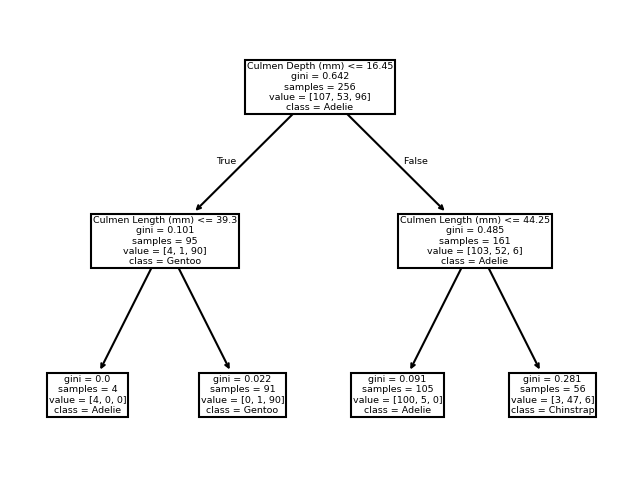

In [ ]:
# Write your code here.
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(
    tree,
    feature_names=culmen_columns,  # 2 culmen columns used in tree
    class_names=tree.classes_.tolist(),
    impurity=True,   # show impurity at each node
    ax=ax   # plot on plt.subplots
)


Compute the accuracy of the decision tree on the testing data.

In [16]:
# Write your code here.
tree.score(X_test, y_test)

0.9651162790697675

Slightly worse performance compared to LinearClassifier.